# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


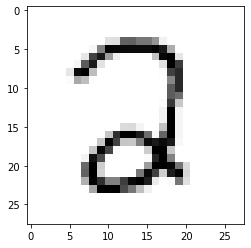

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2532296531620116
train accuracy is: 0.4547654815556668, test accuracy is 0.4536290322580645


Epoch 10 Loss 0.21687857988773404
train accuracy is: 0.8514438324152896, test accuracy is 0.8679435483870968


Epoch 20 Loss 0.12377804420393454
train accuracy is: 0.8980971457185779, test accuracy is 0.9102822580645161


Epoch 30 Loss 0.07164720202564268
train accuracy is: 0.9251377065598397, test accuracy is 0.9400201612903226


Epoch 40 Loss 0.053886701546796624
train accuracy is: 0.9399098647971958, test accuracy is 0.9516129032258065


Epoch 50 Loss 0.04530208865752915
train accuracy is: 0.9485060924720414, test accuracy is 0.9591733870967742


Epoch 60 Loss 0.04021156065900123
train accuracy is: 0.9530963111333667, test accuracy is 0.9702620967741935


Epoch 70 Loss 0.03680030917099007
train accuracy is: 0.957185778668002, test accuracy is 0.9702620967741935


Epoch 80 Loss 0.034323993812999984
train accuracy is: 0.9600233683859122, test accuracy is 0.9722782258064516


Epoch 90 Loss 0.03241271813644606
train accuracy is: 0.9625271240193624, test accuracy is 0.9707661290322581


Epoch 100 Loss 0.030866612553204144
train accuracy is: 0.9646135870472375, test accuracy is 0.9707661290322581


Epoch 110 Loss 0.029583229837791002
train accuracy is: 0.9664496745117677, test accuracy is 0.9712701612903226


Epoch 120 Loss 0.028498683195691127
train accuracy is: 0.9677015523284928, test accuracy is 0.9712701612903226


Epoch 130 Loss 0.027553062125113565
train accuracy is: 0.9686195960607578, test accuracy is 0.9707661290322581


Epoch 140 Loss 0.026722057045187406
train accuracy is: 0.9693707227507928, test accuracy is 0.9717741935483871


Epoch 150 Loss 0.025980855224992074
train accuracy is: 0.9702053079619429, test accuracy is 0.9717741935483871


Epoch 160 Loss 0.025317307770614514
train accuracy is: 0.970956434651978, test accuracy is 0.9722782258064516


Epoch 170 Loss 0.024713654852986766
train accuracy is: 0.9716241028208981, test accuracy is 0.9727822580645161


Epoch 180 Loss 0.024160115828199772
train accuracy is: 0.972041395426473, test accuracy is 0.9742943548387096


Epoch 190 Loss 0.023649105685847178
train accuracy is: 0.972458688032048, test accuracy is 0.9737903225806451


Epoch 200 Loss 0.023164989428942993
train accuracy is: 0.9730428976798531, test accuracy is 0.9737903225806451


Epoch 210 Loss 0.022722975538632985
train accuracy is: 0.9739609414121182, test accuracy is 0.9737903225806451


Epoch 220 Loss 0.022299236322614144
train accuracy is: 0.9742947754965782, test accuracy is 0.9742943548387096


Epoch 230 Loss 0.021895065619180545
train accuracy is: 0.9746286095810383, test accuracy is 0.9742943548387096


Epoch 240 Loss 0.02150508774801036
train accuracy is: 0.9751293607077283, test accuracy is 0.9742943548387096


0.034358583105775484

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.2393764843891359
train accuracy is: 0.685194458354198, test accuracy is 0.7016129032258065


Epoch 10 Loss 0.10206392865525879
train accuracy is: 0.9122850943081289, test accuracy is 0.922883064516129


Epoch 20 Loss 0.07865440231640913
train accuracy is: 0.9288098814889, test accuracy is 0.9410282258064516


Epoch 30 Loss 0.0677496086574491
train accuracy is: 0.9367384409948256, test accuracy is 0.9480846774193549


Epoch 40 Loss 0.06116251640757418
train accuracy is: 0.9419128693039559, test accuracy is 0.9546370967741935


Epoch 50 Loss 0.05667636987108038
train accuracy is: 0.9455015857119012, test accuracy is 0.9556451612903226


Epoch 60 Loss 0.053385837290721584
train accuracy is: 0.9484226339509264, test accuracy is 0.9591733870967742


Epoch 70 Loss 0.050849818462511825
train accuracy is: 0.9499248873309964, test accuracy is 0.9601814516129032


Epoch 80 Loss 0.04882148900552428
train accuracy is: 0.9515940577532966, test accuracy is 0.9616935483870968


Epoch 90 Loss 0.047153699619460705
train accuracy is: 0.9527624770489067, test accuracy is 0.9637096774193549


Epoch 100 Loss 0.04575047739365228
train accuracy is: 0.9535970622600568, test accuracy is 0.9637096774193549


Epoch 110 Loss 0.044549064253199586
train accuracy is: 0.9546820230345519, test accuracy is 0.9647177419354839


Epoch 120 Loss 0.043505713453884425
train accuracy is: 0.9559339008512769, test accuracy is 0.9662298387096774


Epoch 130 Loss 0.04258745030375382
train accuracy is: 0.956601569020197, test accuracy is 0.9662298387096774


Epoch 140 Loss 0.04177142175566402
train accuracy is: 0.957102320146887, test accuracy is 0.9657258064516129


Epoch 150 Loss 0.04103878090736469
train accuracy is: 0.9577699883158071, test accuracy is 0.9657258064516129


Epoch 160 Loss 0.04037754904209007
train accuracy is: 0.958604573526957, test accuracy is 0.9662298387096774


Epoch 170 Loss 0.03977539954131791
train accuracy is: 0.9591053246536472, test accuracy is 0.9667338709677419


Epoch 180 Loss 0.03922480648013735
train accuracy is: 0.9594391587381071, test accuracy is 0.9667338709677419


Epoch 190 Loss 0.03871801174252751
train accuracy is: 0.9600233683859122, test accuracy is 0.9667338709677419


Epoch 200 Loss 0.03825008505775136
train accuracy is: 0.9602737439492572, test accuracy is 0.9682459677419355


Epoch 210 Loss 0.037815177974302866
train accuracy is: 0.9605241195126022, test accuracy is 0.9682459677419355


Epoch 220 Loss 0.037408856514577725
train accuracy is: 0.9612752462026373, test accuracy is 0.9682459677419355


Epoch 230 Loss 0.037031190263292955
train accuracy is: 0.9616090802870974, test accuracy is 0.9682459677419355


Epoch 240 Loss 0.03667569337419844
train accuracy is: 0.9617759973293273, test accuracy is 0.9682459677419355


0.04733454987384192

### Comparing results of NN and LR

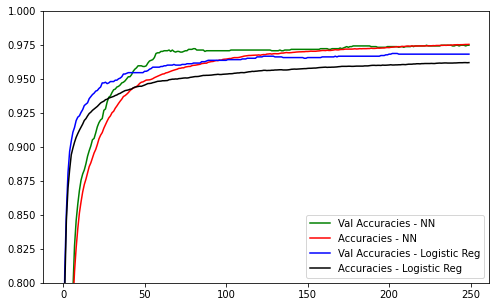

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

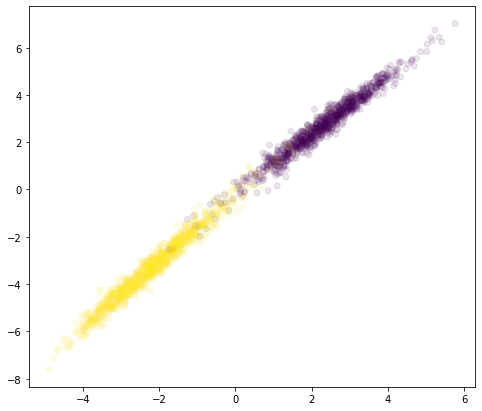

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

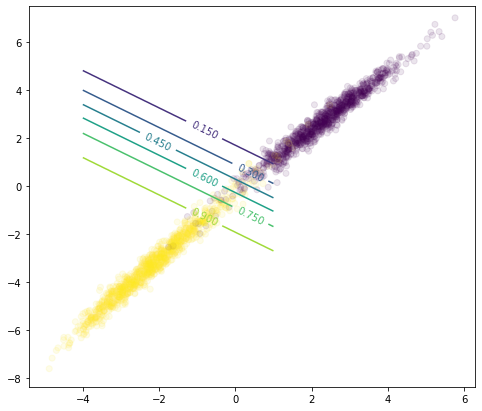

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );